Описание задания:
В домашнем задании нужно решить задачу классификации наличия болезни сердца у пациентов. Данные для обучения моделей необходимо загрузить самостоятельно с сайта. Целевая переменная – наличие болезни сердца (HeartDisease), принимает значения 0 или 1 в зависимости от отсутствия или наличия болезни соответственно. (Подробнее о признаках можно прочесть в описании датасета на сайте. Для выполнения работы не обязательно вникать в медицинские показатели.)
Этапы работы:

    1. Получите данные и загрузите их в рабочую среду. (Jupyter Notebook или другую)
    2. Подготовьте датасет к обучению моделей.
        a) Категориальные переменные переведите в цифровые значения. Можно использовать pd.get_dummies, preprocessing.LabelEncoder. Старайтесь не использовать для этой задачи циклы.
        b) *Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака).
    3. Разделите выборку на обучающее и тестовое подмножество. 80% данных оставить на обучающее множество, 20% на тестовое.
    4. Обучите дерево решений на обучающем множестве. Используйте следующие модели:
        a) tree.DecisionTreeClassifier
        b) ensemble.RandomForestClassifier
    5. Для тестового множества сделайте предсказание целевой переменной. Выведите метрики для каждой построенной модели с помощью metrics.classification_report.
    6. Выведите важность признаков, полученную после обучения модели из п. 4b в виде столбчатой диаграммы. Отсортируйте важность по убыванию.
    7. Обучите бэггинг над моделью из п. 4a. Используйте ensemble.BaggingClassifier.
        a) Повторите п. 5
    8. Обучите стекинг трех моделей: из п. 4a, п. 4b и svm.LinearSVC. Используйте ensemble.StackingClassifier.
        a) Повторите п. 5
    9. Сформулируйте выводы по проделанной работе.
        a) Сравните метрики построенных моделей.
        b) Напишите свое мнение, какая модель наилучшая и почему.
    Для получения зачета по этому домашнему заданию, минимально, должны быть обучены следующие модели: дерево решений, стекинг трех моделей. В данных должны быть обработаны категориальные значения.
    Результат: получены знания по использованию базовых ансамблевых методов.

In [77]:
# импорт библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from sklearn.ensemble import  BaggingClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import StackingClassifier

In [17]:
# загружаю данные
df = pd.read_csv("./HW_data/heart.xls")
# df.info()
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [40]:
# делю данные и преобразую признаки
X = df.drop(columns='HeartDisease')
Y = df['HeartDisease']
X['Sex'].replace(['M', 'F'], [0,1], inplace = True) # преобразую пол
X['ExerciseAngina'].replace(['N', 'Y'], [0,1], inplace = True) # преобразую пол
X = pd.get_dummies(X, dtype=int)
X.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,0,140,289,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,1,160,180,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,0,130,283,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,1,138,214,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,0,150,195,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1


In [56]:
# делю данные на выборки и обучаю модели
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
tree = DecisionTreeClassifier()
forest = RandomForestClassifier()
tree.fit(X_train, y_train)
forest.fit(X_train, y_train)
tree_predict = tree.predict(X_test)
forest_predict = forest.predict(X_test)
print(f"tree: {classification_report(y_test, tree_predict)}")
print(f"forest: {classification_report(y_test, forest_predict)}")

tree:               precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

forest:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



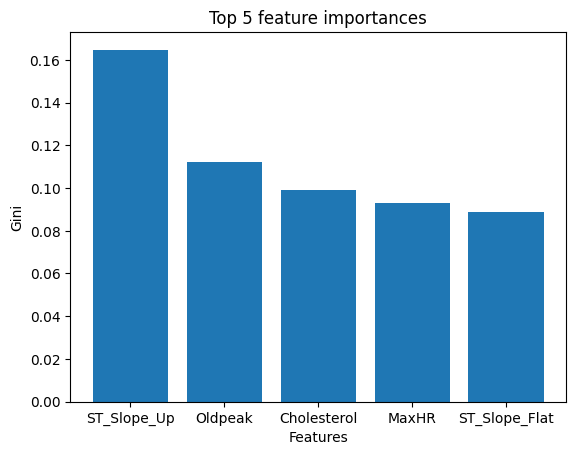

In [61]:
# строю диаграмму важности признаков леса
imp = pd.Series(forest.feature_importances_)
imp.index = pd.Series(X_test.columns)
imp = imp.sort_values(ascending=False)
plt.title('Top 5 feature importances')
plt.xlabel('Features')
plt.ylabel('Gini')
plt.bar(imp.head().index, imp.head())
plt.show()

In [64]:
# использую бэггинг
bagging = BaggingClassifier(DecisionTreeClassifier())
bagging.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier())

In [66]:
# вывожу метрики
bagging_predict = bagging.predict(X_test)
print(f"tree: {classification_report(y_test, tree_predict)}")
print(f"forest: {classification_report(y_test, forest_predict)}")
print(f"bagging: {classification_report(y_test, bagging_predict)}")

tree:               precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

forest:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

bagging:               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       1

In [75]:
# использую LinearSVC
lin_svc = LinearSVC(max_iter=100000)
lin_svc.fit(X_train, y_train)
lin_svc.score(X_test, y_test)

/home/vk/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.875

In [79]:
# использую стэкинг
stacking = StackingClassifier(
    [
        ('tree', DecisionTreeClassifier()),
        ('forest', RandomForestClassifier()),
        ('lin_svc', LinearSVC())
    ])
stacking.fit(X_train, y_train)


/home/vk/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vk/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vk/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vk/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vk/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vk/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase

StackingClassifier(estimators=[('tree', DecisionTreeClassifier()),
                               ('forest', RandomForestClassifier()),
                               ('lin_svc', LinearSVC())])

In [91]:
# вывожу метрики
stacking_predict = stacking.predict(X_test)
print(f"tree: {classification_report(y_test, tree_predict)}")
print(f"forest: {classification_report(y_test, forest_predict)}")

tree:               precision    recall  f1-score   support

           0       0.73      0.84      0.78        77
           1       0.87      0.78      0.82       107

    accuracy                           0.80       184
   macro avg       0.80      0.81      0.80       184
weighted avg       0.81      0.80      0.81       184

forest:               precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [90]:
print(f"bagging: {classification_report(y_test, bagging_predict)}")
print(f"stacking: {classification_report(y_test, stacking_predict)}")

bagging:               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

stacking:               precision    recall  f1-score   support

           0       0.87      0.86      0.86        77
           1       0.90      0.91      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



Выводы:
Две лучшие модели forest и stacking, т.к. forest в т.ч. использует алгоритмы бэггинга, а стэкинг выбиоает лучшие результаты из всех загруженных в него моделей.